<a href="https://colab.research.google.com/github/TariqIjaz/data-analyst/blob/main/New_Gym_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gym Data Analysis**
   

# Dataset Overview and Objectives

## Purpose:
- The dataset aims to analyze the fitness metrics and exercise patterns of gym members.
- Key features include demographics (e.g., age, gender), health indicators (e.g., BMI, fat percentage), and exercise details (e.g., calories burned, workout type).

## Data Characteristics:
- **Total samples**: 973 rows and 15 columns.
- **No missing values**.
- **Data types**:
  - Categorical (e.g., gender, workout type).
  - Numerical (e.g., calories burned, BMI).

**Insights**: The dataset is clean and well-structured, ready for exploratory and predictive analyses.

---

# Exploratory Data Analysis (EDA)

The notebook includes multiple charts analyzing key relationships and trends. Here’s a summary of what each chart achieves:

## a. Calorie Burn by Workout Type
- **Purpose**: Understand how calorie expenditure varies across workout types.
- **Findings**:
  - Cardio-based exercises consistently result in higher calorie burn compared to other types like yoga or strength training.
  - HIIT (High-Intensity Interval Training) also shows significant calorie expenditure.

## b. BMI Trends Across Age Groups
- **Purpose**: Explore the relationship between age groups and BMI to identify patterns in body composition.
- **Findings**:
  - Younger age groups tend to have lower BMI values.
  - BMI increases slightly with age, reflecting changes in metabolism and lifestyle.

## c. Workout Frequency and Calories Burned
- **Purpose**: Analyze the relationship between workout consistency and calorie expenditure.
- **Findings**:
  - Higher workout frequencies correlate with increased calories burned.
  - Members exercising 5–7 days/week achieve the highest calorie burn.

## d. Water Intake vs. Workout Duration
- **Purpose**: Assess whether hydration levels influence workout duration.
- **Findings**:
  - Members with higher water intake tend to sustain longer workout sessions.

## e. Gender-Based Analysis
- **Purpose**: Compare fitness metrics across genders.
- **Findings**:
  - Males tend to burn slightly more calories than females for the same workout type and duration.
  - BMI and fat percentage distributions differ across genders.

### General Insights from EDA:
- Consistency, hydration, and exercise type significantly influence calorie expenditure.
- Gender and age introduce notable variations in fitness performance metrics.

---

# Predictive Analysis

## a. Linear Regression
- **Purpose**: Build a simple model to predict calorie burn based on features like age, BMI, and workout frequency.
- **Findings**:
  - The model had limited predictive power with an R² score of ~0.30.
  - Indicates linear relationships may not fully capture the complexity of the dataset.

## b. Random Forest Regression
- **Purpose**: Use a non-linear model to capture feature interactions and improve predictions.
- **Findings**:
  - Initial R² score: ~0.452, showing improvement over linear regression.
  - Tuning hyperparameters (e.g., depth and tree count) improved the R² to ~0.464.
  - **Key drivers of calorie burn**:
    - Workout Frequency × Water Intake.
    - Workout Frequency × Max BPM.
    - Age × BMI.

---

# Insights and Conclusions

## EDA Insights:
- Calorie burn is most influenced by workout frequency, type, and hydration.
- Younger members and those with consistent workout routines tend to achieve better fitness outcomes.
- Gender differences highlight the need for personalized training plans.

## Predictive Modeling:
- The Random Forest model effectively captures complex interactions.
- While the model improves predictions, ~53% of variance remains unexplained, suggesting missing features (e.g., diet, sleep).

## Actionable Recommendations:
- Focus on consistency and hydration to maximize calorie burn.
- Personalized fitness plans should account for age, BMI, and gender.


#**Data Analysis:**

##2) Data Preparation

###2.1) Importing Basic Libraries


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 11
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'



In [2]:
import warnings

# Suppress specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)


###2.1) Loading Dataset


### Gym Members' Dataset Overview

This dataset provides a detailed overview of gym members' exercise routines, physical attributes, and fitness metrics. It contains 973 samples of gym data, including key performance indicators such as heart rate, calories burned, and workout duration. Each entry also includes demographic data and experience levels, allowing for comprehensive analysis of fitness patterns, athlete progression, and health trends.

#### Key Features

- **Age**: Age of the gym member.
- **Gender**: Gender of the gym member (Male or Female).
- **Weight (kg)**: Member’s weight in kilograms.
- **Height (m)**: Member’s height in meters.
- **Max_BPM**: Maximum heart rate (beats per minute) during workout sessions.
- **Avg_BPM**: Average heart rate during workout sessions.
- **Resting_BPM**: Heart rate at rest before workout.
- **Session_Duration (hours)**: Duration of each workout session in hours.
- **Calories_Burned**: Total calories burned during each session.
- **Workout_Type**: Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT).
- **Fat_Percentage**: Body fat percentage of the member.
- **Water_Intake (liters)**: Daily water intake during workouts.
- **Workout_Frequency (days/week)**: Number of workout sessions per week.
- **Experience_Level**: Level of experience, from beginner (1) to expert (3).
- **BMI**: Body Mass Index, calculated from height and weight.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

file_path ='/content/drive/MyDrive/gym_members_exercise_tracking.csv'

df=pd.read_csv(file_path)

Mounted at /content/drive


In [4]:
df.head(20)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07


###2.3) Initial Analysis on Dataset

In [5]:
df.shape

(973, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [7]:
df.isnull().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


In [8]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


###2.3.1) Analysis Output

* The Dataset comprises of 973 rows and 15 columns

* There are 0 missing values for all columns

* The type of variables in the dataset are both categorical and numerical format (Object, Integer and Float)

## 3. Preparation for Exploratory Data Analysis(EDA)

### 3.1 Examining unique values and data split

In [9]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [10]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
Age,42
Gender,2
Weight (kg),532
Height (m),51
Max_BPM,40
Avg_BPM,50
Resting_BPM,25
Session_Duration (hours),147
Calories_Burned,621
Workout_Type,4


In [11]:
# List numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# List categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Count the columns
num_cols_count = len(numerical_columns)
cat_cols_count = len(categorical_columns)

# Print results
print(f"Numerical columns ({num_cols_count}): {numerical_columns}")
print(f"Categorical columns ({cat_cols_count}): {categorical_columns}")



Numerical columns (13): ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']
Categorical columns (2): ['Gender', 'Workout_Type']


### 3.2 Separating Variables (Numeric or Catgorical)

In [12]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [13]:
numerical_data = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']
categorical_data = ['Gender', 'Workout_Type']

###3.3 Data Cleaning and Preprocessing


In [14]:
df.duplicated().sum()

0

###3.3.1) Analysis Output

* There are 13 numerical columns and 2 categorical ones.

* There are 0 missing values for all columns

* There are no duplicate entries for either columns


## 4. Exploratory Data Analysis


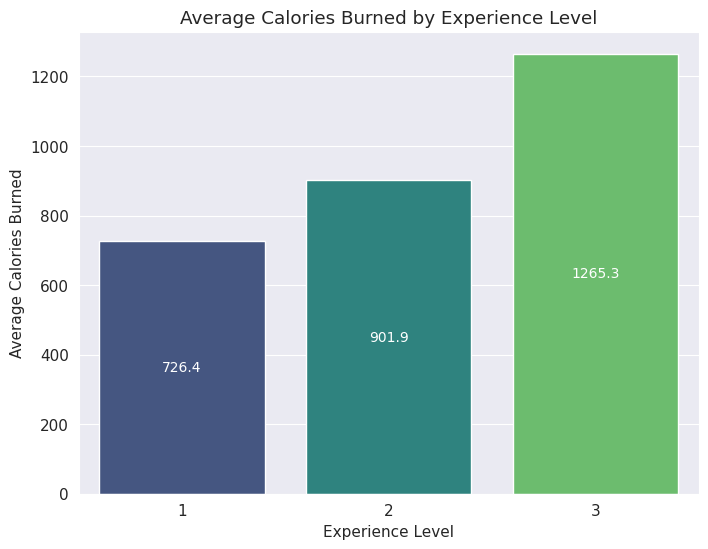

In [15]:
# 1. Relationship Between Experience Level and Calories Burned
experience_calories = df.groupby('Experience_Level')['Calories_Burned'].mean()
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=experience_calories.index, y=experience_calories.values, palette='viridis')
plt.title("Average Calories Burned by Experience Level")
plt.ylabel("Average Calories Burned")
plt.xlabel("Experience Level")
for bar, value in zip(bar_plot.patches, experience_calories.values):
    bar_plot.annotate(f"{value:.1f}", (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                      ha='center', va='center', fontsize=10, color='white')
plt.show()

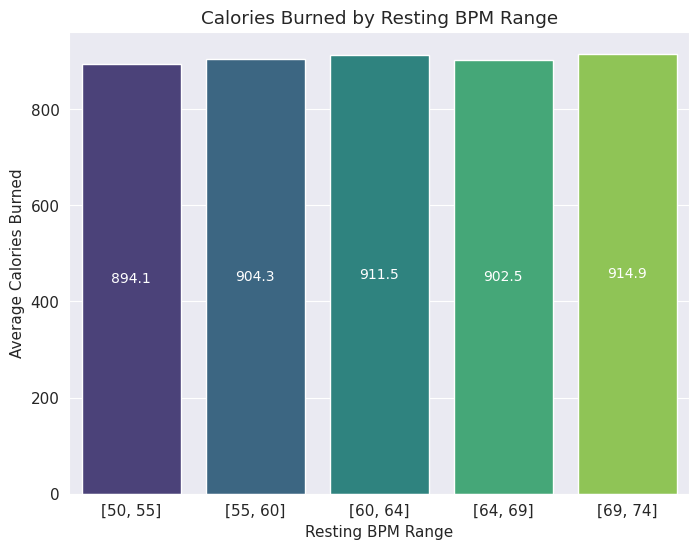

In [16]:
# 2. Impact of Resting BPM on Calories Burned
bins = np.linspace(df['Resting_BPM'].min(), df['Resting_BPM'].max(), 6)
labels = [f"[{int(round(bins[i], 0))}, {int(round(bins[i + 1], 0))}]" for i in range(len(bins) - 1)]
df['Resting_BPM_Range'] = pd.cut(df['Resting_BPM'], bins=bins, labels=labels, include_lowest=True)
resting_bpm_calories = df.groupby('Resting_BPM_Range')['Calories_Burned'].mean()
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=resting_bpm_calories.index, y=resting_bpm_calories.values, palette='viridis')
plt.title("Calories Burned by Resting BPM Range")
plt.ylabel("Average Calories Burned")
plt.xlabel("Resting BPM Range")
for bar, value in zip(bar_plot.patches, resting_bpm_calories.values):
    bar_plot.annotate(f"{value:.1f}", (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                      ha='center', va='center', fontsize=10, color='white')
plt.show()



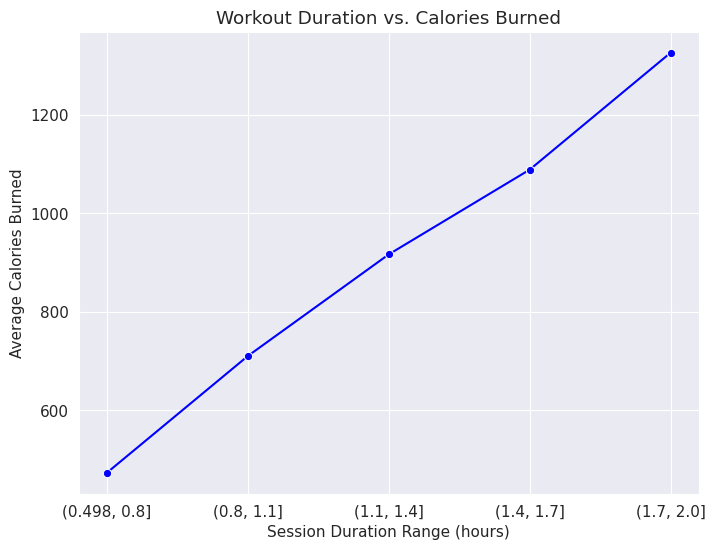

In [17]:
# 3. Workout Duration vs. Calories Burned
duration_calories = df.groupby(pd.cut(df['Session_Duration (hours)'], bins=5))['Calories_Burned'].mean()
plt.figure(figsize=(8, 6))
sns.lineplot(x=duration_calories.index.astype(str), y=duration_calories.values, marker='o', linestyle='-', color='b')
plt.title("Workout Duration vs. Calories Burned")
plt.ylabel("Average Calories Burned")
plt.xlabel("Session Duration Range (hours)")
plt.grid(True)
plt.show()



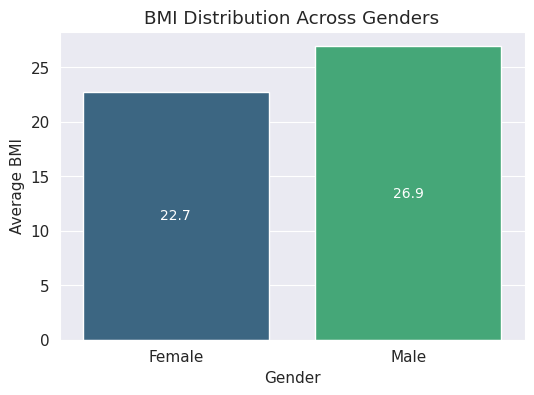

In [18]:
# 4. BMI Distribution Across Genders
bmi_gender = df.groupby('Gender')['BMI'].mean()
plt.figure(figsize=(6, 4))
bar_plot = sns.barplot(x=bmi_gender.index, y=bmi_gender.values, palette='viridis')
plt.title("BMI Distribution Across Genders")
plt.ylabel("Average BMI")
plt.xlabel("Gender")
for bar, value in zip(bar_plot.patches, bmi_gender.values):
    bar_plot.annotate(f"{value:.1f}", (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                      ha='center', va='center', fontsize=10, color='white')
plt.show()



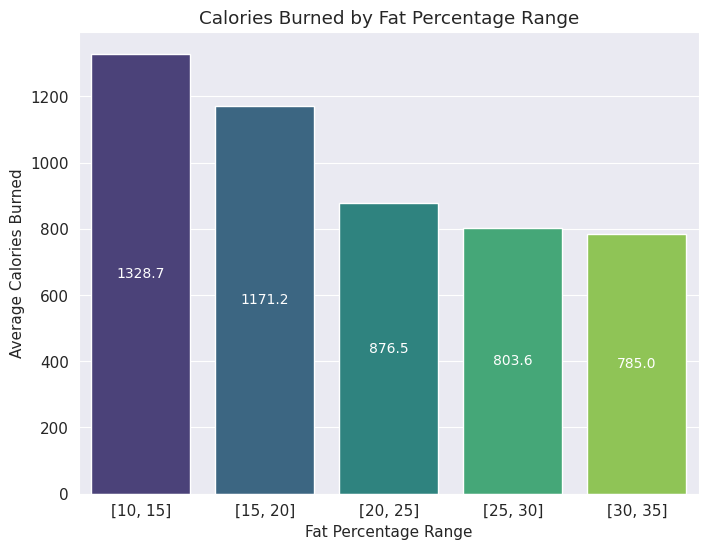

In [19]:
# 5. Relationship Between Fat Percentage and Calories Burned
bins = np.linspace(df['Fat_Percentage'].min(), df['Fat_Percentage'].max(), 6)
labels = [f"[{int(round(bins[i], 0))}, {int(round(bins[i + 1], 0))}]" for i in range(len(bins) - 1)]
df['Fat_Percentage_Range'] = pd.cut(df['Fat_Percentage'], bins=bins, labels=labels, include_lowest=True)
fat_calories = df.groupby('Fat_Percentage_Range')['Calories_Burned'].mean()
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=fat_calories.index, y=fat_calories.values, palette='viridis')
plt.title("Calories Burned by Fat Percentage Range")
plt.ylabel("Average Calories Burned")
plt.xlabel("Fat Percentage Range")
for bar, value in zip(bar_plot.patches, fat_calories.values):
    bar_plot.annotate(f"{value:.1f}", (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                      ha='center', va='center', fontsize=10, color='white')
plt.show()



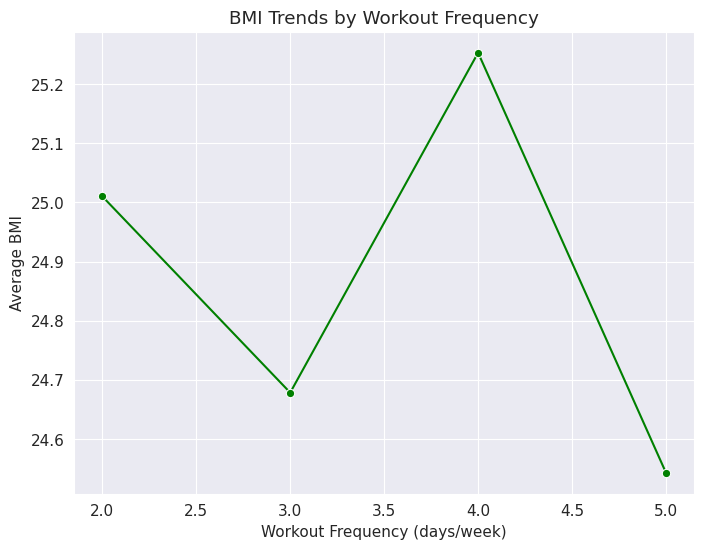

In [20]:
# 6. Workout Frequency and BMI Trends
frequency_bmi = df.groupby('Workout_Frequency (days/week)')['BMI'].mean()
plt.figure(figsize=(8, 6))
sns.lineplot(x=frequency_bmi.index, y=frequency_bmi.values, marker='o', linestyle='-', color='g')
plt.title("BMI Trends by Workout Frequency")
plt.ylabel("Average BMI")
plt.xlabel("Workout Frequency (days/week)")
plt.grid(True)
plt.show()



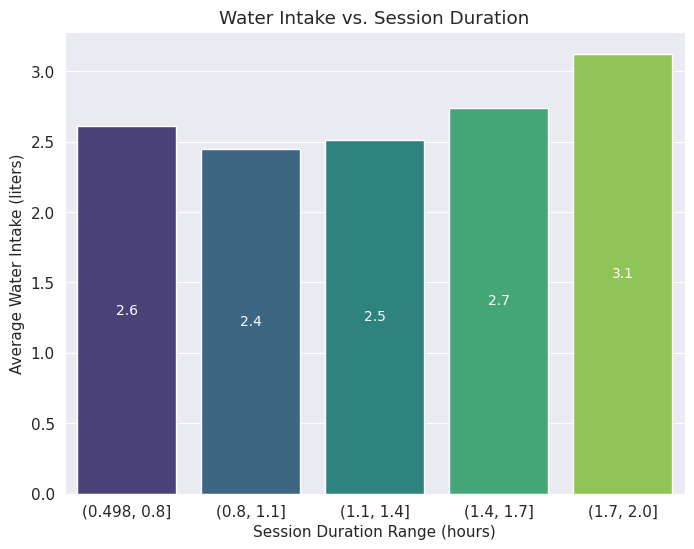

In [21]:
# 7. Water Intake vs. Session Duration
water_duration = df.groupby(pd.cut(df['Session_Duration (hours)'], bins=5))['Water_Intake (liters)'].mean()
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=water_duration.index.astype(str), y=water_duration.values, palette='viridis')
plt.title("Water Intake vs. Session Duration")
plt.ylabel("Average Water Intake (liters)")
plt.xlabel("Session Duration Range (hours)")
for bar, value in zip(bar_plot.patches, water_duration.values):
    bar_plot.annotate(f"{value:.1f}", (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                      ha='center', va='center', fontsize=10, color='white')
plt.show()



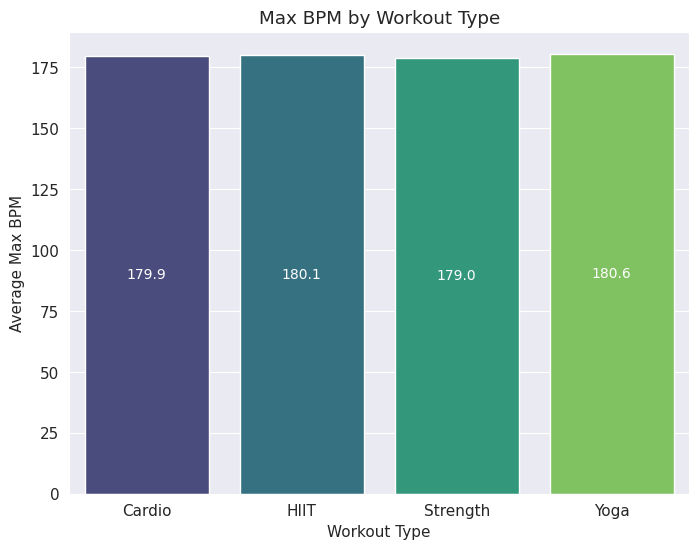

In [22]:
# 8. Max BPM vs. Workout Type
max_bpm_workout = df.groupby('Workout_Type')['Max_BPM'].mean()
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=max_bpm_workout.index, y=max_bpm_workout.values, palette='viridis')
plt.title("Max BPM by Workout Type")
plt.ylabel("Average Max BPM")
plt.xlabel("Workout Type")
for bar, value in zip(bar_plot.patches, max_bpm_workout.values):
    bar_plot.annotate(f"{value:.1f}", (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                      ha='center', va='center', fontsize=10, color='white')
plt.show()



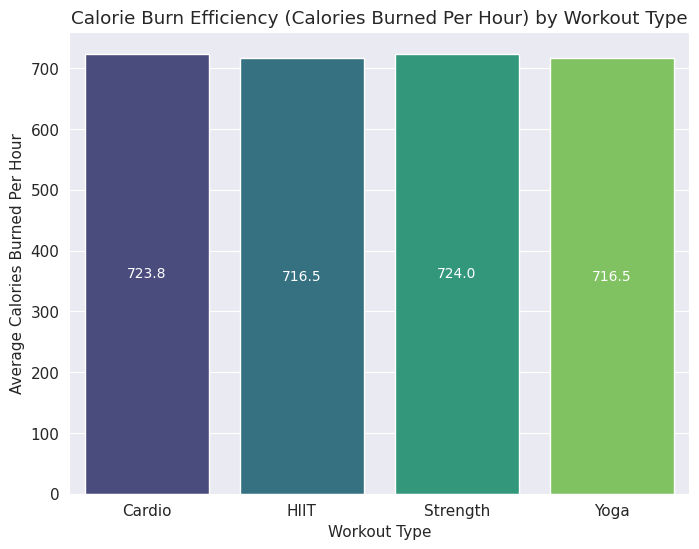

In [23]:
# 9. Calorie Burn Efficiency (Calories Burned Per Hour)
df['Calories_Per_Hour'] = df['Calories_Burned'] / df['Session_Duration (hours)']
efficiency_workout = df.groupby('Workout_Type')['Calories_Per_Hour'].mean()
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=efficiency_workout.index, y=efficiency_workout.values, palette='viridis')
plt.title("Calorie Burn Efficiency (Calories Burned Per Hour) by Workout Type")
plt.ylabel("Average Calories Burned Per Hour")
plt.xlabel("Workout Type")
for bar, value in zip(bar_plot.patches, efficiency_workout.values):
    bar_plot.annotate(f"{value:.1f}", (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                      ha='center', va='center', fontsize=10, color='white')
plt.show()


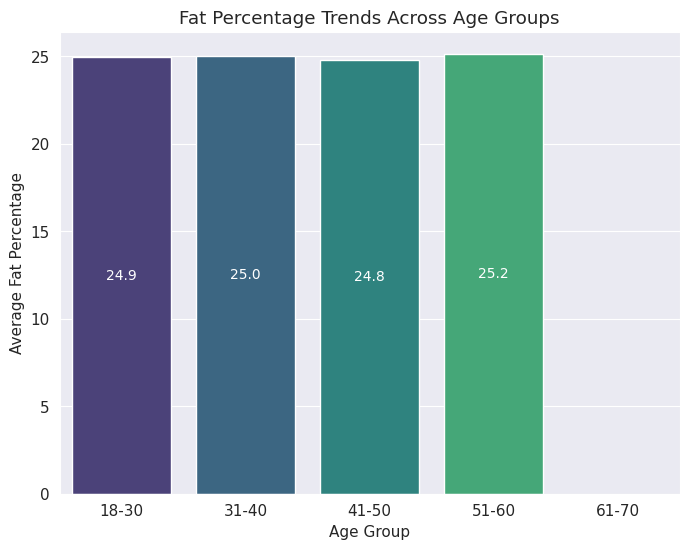

In [24]:

# 10. Fat Percentage Trends Across Age Groups
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_group_fat = df.groupby('Age_Group')['Fat_Percentage'].mean()
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=age_group_fat.index, y=age_group_fat.values, palette='viridis')
plt.title("Fat Percentage Trends Across Age Groups")
plt.ylabel("Average Fat Percentage")
plt.xlabel("Age Group")
for bar, value in zip(bar_plot.patches, age_group_fat.values):
    bar_plot.annotate(f"{value:.1f}", (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                      ha='center', va='center', fontsize=10, color='white')
plt.show()


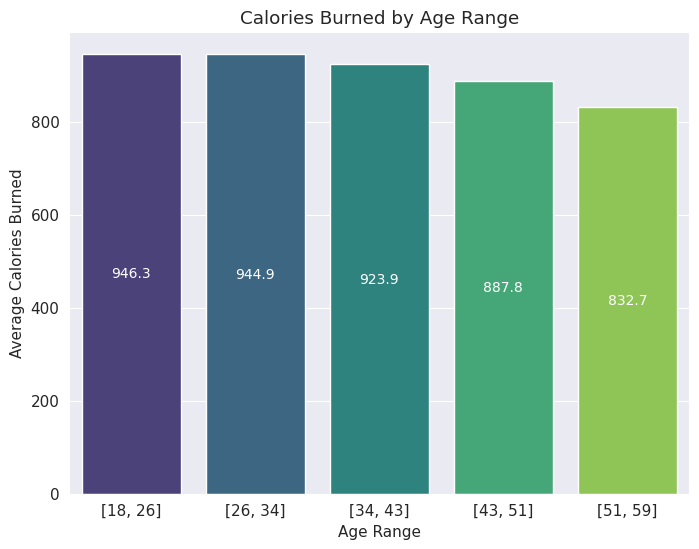

In [25]:
# 11. Relationship Between Age and Calories Burned
bins = np.linspace(df['Age'].min(), df['Age'].max(), 6)
labels = [f"[{int(round(bins[i], 0))}, {int(round(bins[i + 1], 0))}]" for i in range(len(bins) - 1)]
df['Age_Range'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)
age_calories = df.groupby('Age_Range')['Calories_Burned'].mean()
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=age_calories.index, y=age_calories.values, palette='viridis')
plt.title("Calories Burned by Age Range")
plt.ylabel("Average Calories Burned")
plt.xlabel("Age Range")
for bar, value in zip(bar_plot.patches, age_calories.values):
    bar_plot.annotate(f"{value:.1f}", (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                      ha='center', va='center', fontsize=10, color='white')
plt.show()

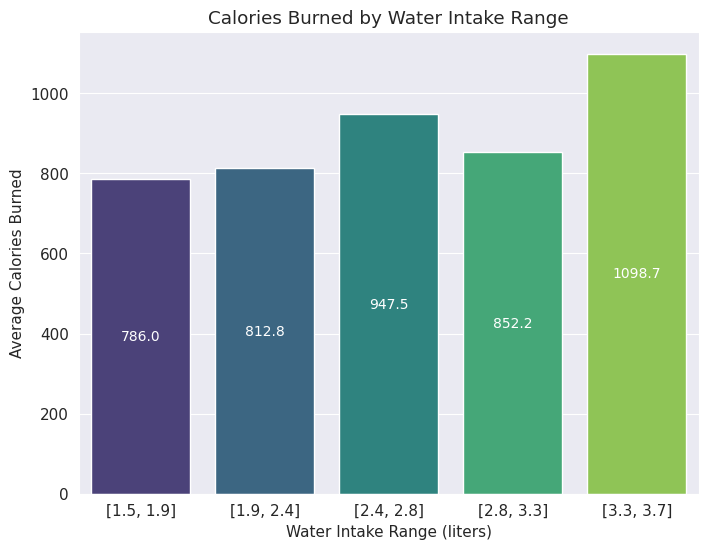

In [26]:
# 12. Water Intake vs. Calories Burned
bins = np.linspace(df['Water_Intake (liters)'].min(), df['Water_Intake (liters)'].max(), 6)
bins = np.round(bins, 1)  # Round bin edges to 1 decimal place for unique labels
labels = [f"[{bins[i]}, {bins[i + 1]}]" for i in range(len(bins) - 1)]
df['Water_Intake_Range'] = pd.cut(df['Water_Intake (liters)'], bins=bins, labels=labels, include_lowest=True)
water_calories = df.groupby('Water_Intake_Range')['Calories_Burned'].mean()

# Plotting Water Intake vs. Calories Burned
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=water_calories.index, y=water_calories.values, palette='viridis')
plt.title("Calories Burned by Water Intake Range")
plt.ylabel("Average Calories Burned")
plt.xlabel("Water Intake Range (liters)")
for bar, value in zip(bar_plot.patches, water_calories.values):
    bar_plot.annotate(f"{value:.1f}", (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                      ha='center', va='center', fontsize=10, color='white')
plt.show()

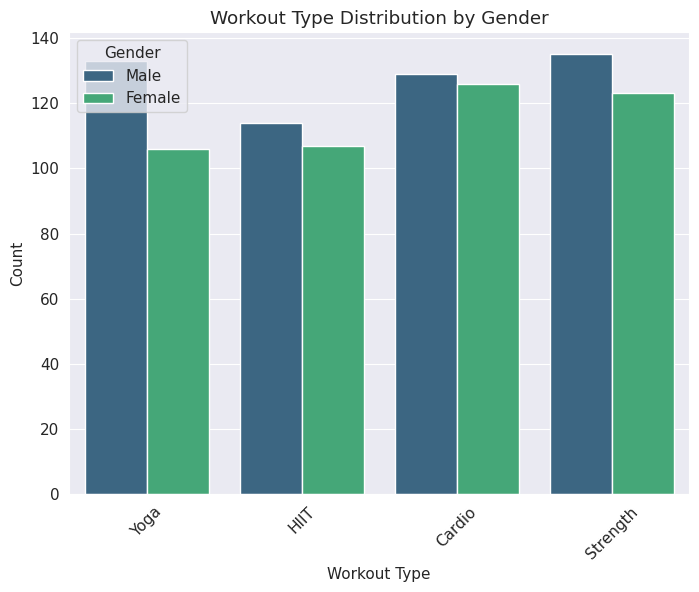

In [27]:

# 13. Workout Type Distribution by Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Workout_Type', hue='Gender', palette='viridis')
plt.title("Workout Type Distribution by Gender")
plt.ylabel("Count")
plt.xlabel("Workout Type")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()


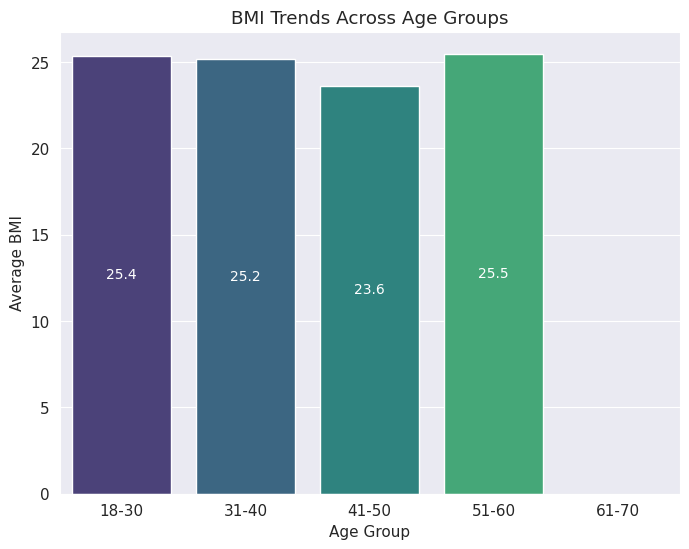

In [28]:
# 14. BMI Trends Across Age Groups
age_group_bmi = df.groupby('Age_Group')['BMI'].mean()
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=age_group_bmi.index, y=age_group_bmi.values, palette='viridis')
plt.title("BMI Trends Across Age Groups")
plt.ylabel("Average BMI")
plt.xlabel("Age Group")
for bar, value in zip(bar_plot.patches, age_group_bmi.values):
    bar_plot.annotate(f"{value:.1f}", (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                      ha='center', va='center', fontsize=10, color='white')

plt.show()

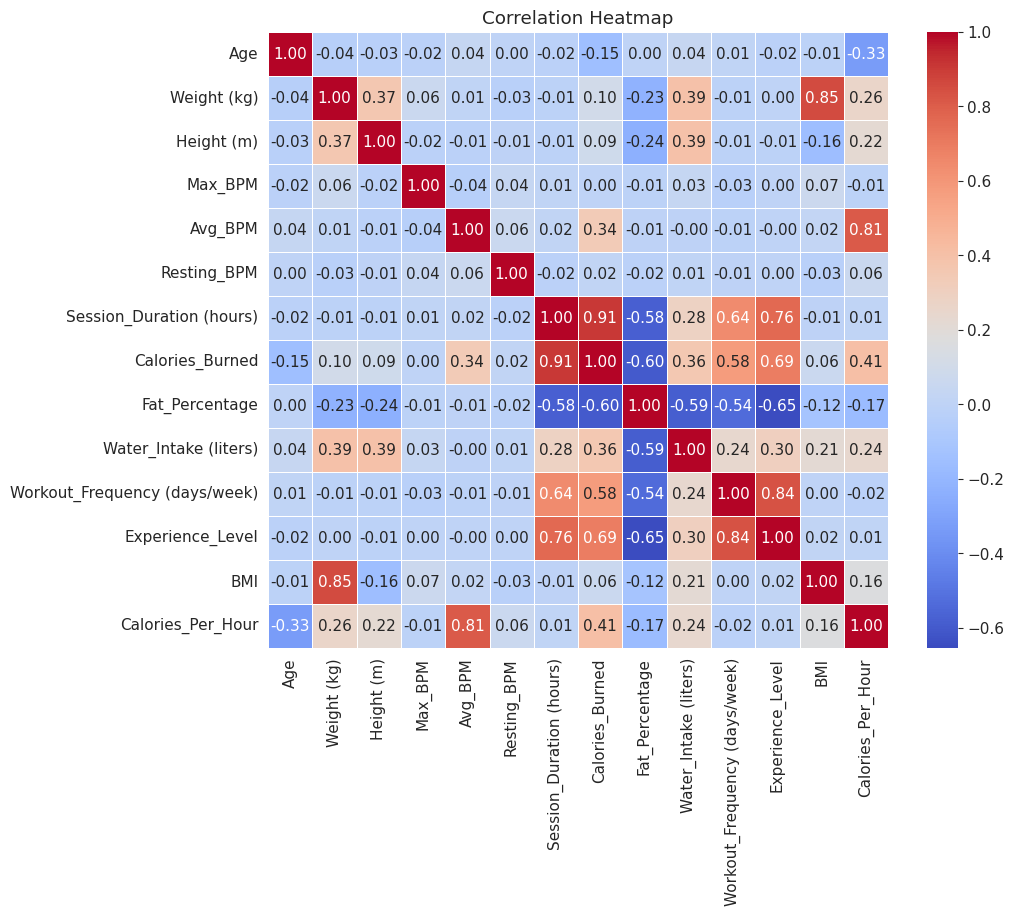

In [29]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


#### Strong Positive Correlations

##### **`Session_Duration (hours)` and `Calories_Burned` (0.91):**
- Longer workout durations result in higher calories burned, as expected.
- This validates the impact of workout time on energy expenditure.

##### **`Workout_Frequency (days/week)` and `Calories_Burned` (0.84):**
- Consistent workout routines are highly correlated with calorie burn, emphasizing the importance of regular exercise.

##### **`BMI` and `Weight (kg)` (0.85):**
- Higher BMI values strongly correlate with weight, reflecting the direct relationship between body weight and BMI calculations.


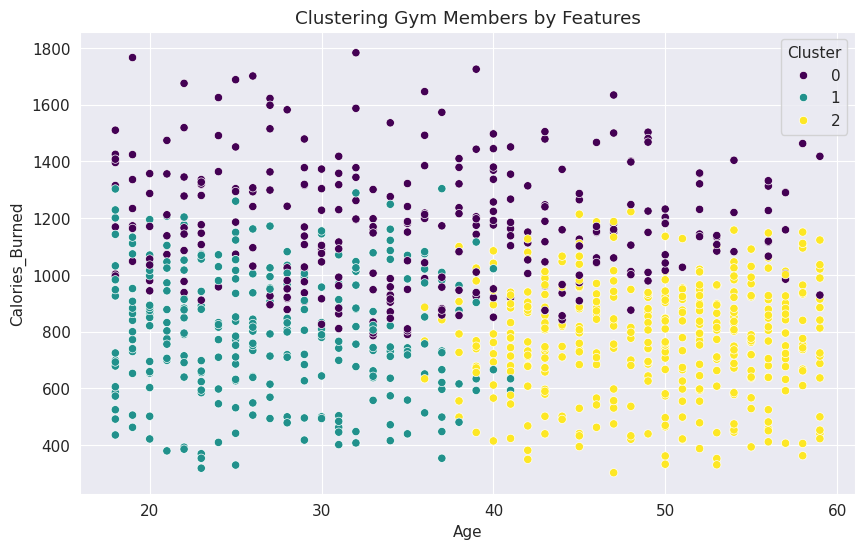

In [30]:
#Clustering Analysis
#Use clustering (e.g., k-means) to group similar gym members based on features like BMI, age, calories burned, etc.

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[['Age', 'BMI', 'Calories_Burned', 'Workout_Frequency (days/week)']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df['Cluster'] = clusters

sns.scatterplot(data=df, x='Age', y='Calories_Burned', hue='Cluster', palette='viridis')
plt.title("Clustering Gym Members by Features")
plt.show()


#### Cluster Groups

##### **Cluster 0 (Purple):**
- Members in this cluster have varying calorie burn levels across all age groups.
- These could represent moderately active individuals with diverse fitness goals.

##### **Cluster 1 (Green):**
- Members in this group seem to have lower calorie burns and are more concentrated among younger individuals.
- Likely represents beginners or less active members.

##### **Cluster 2 (Yellow):**
- This cluster shows members with higher calorie burns, particularly across middle-aged to older adults.
- Likely represents highly consistent and active gym-goers.

---

##### Age and Calories Burned
- The scatter plot reveals distinct patterns in calorie burn relative to age across clusters.
- **Younger members (Cluster 1)** tend to burn fewer calories.
- **Older, consistent gym-goers (Cluster 2)** achieve higher calorie burns.


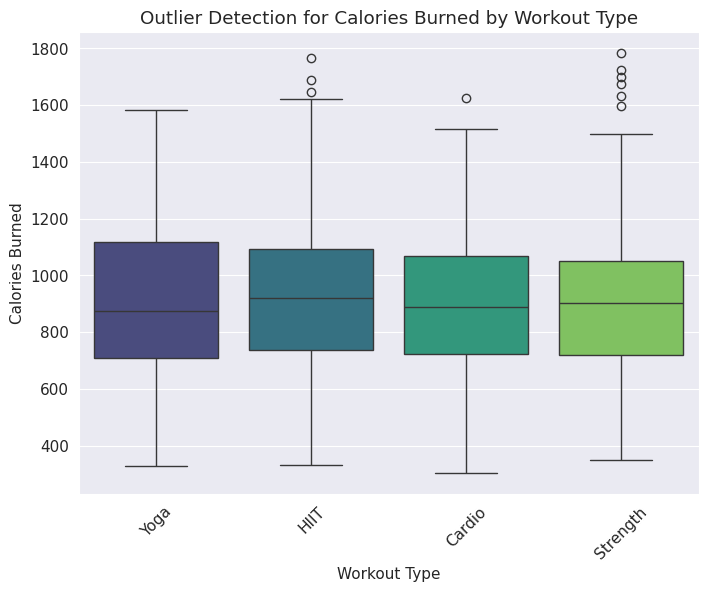

In [31]:
#Outlier Detection
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Workout_Type', y='Calories_Burned', palette='viridis')
plt.title("Outlier Detection for Calories Burned by Workout Type")
plt.ylabel("Calories Burned")
plt.xlabel("Workout Type")
plt.xticks(rotation=45)
plt.show()


#### 1. Median Calories Burned by Workout Type

##### Yoga:
- Median calories burned are lower compared to other workout types.
- Reflects that yoga is a low-intensity workout focusing more on flexibility and mindfulness rather than calorie burning.

##### HIIT (High-Intensity Interval Training):
- Median calories burned are higher than yoga and comparable to strength training.
- Demonstrates HIIT’s efficiency in burning a significant number of calories in a short time due to its high intensity.

##### Cardio:
- Has the highest calorie burn among all workout types, indicating its effectiveness for aerobic exercise and weight loss.

##### Strength Training:
- Median calories burned are comparable to HIIT but slightly lower than cardio.
- Strength training emphasizes muscle building, so calorie burn is moderate during the workout but continues post-exercise due to the afterburn effect.

---

#### 2. Range of Calories Burned

##### Yoga:
- Shows a narrow range of calorie burn with few extreme values, indicating a relatively consistent output for this workout type.

##### HIIT and Strength Training:
- Both exhibit wider ranges of calorie burn, reflecting variability in session intensity and duration.
- HIIT has notable outliers with extremely high calories burned, suggesting exceptional efforts or prolonged sessions.

##### Cardio:
- The widest range among all types, capturing variability in intensity (e.g., jogging vs. running) and duration.

---

#### 3. Outliers
- **HIIT and Strength Training**: Represent instances of highly intense or extended workouts.
- These highlight that some individuals push their sessions significantly beyond the typical effort.


## 5 Predictive Analysis


In [32]:
# Predictive Analysis
# Build a simple predictive model to estimate calories burned based on features like workout type, age, and BMI.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['Age', 'BMI', 'Workout_Frequency (days/week)', 'Max_BPM', 'Water_Intake (liters)']].dropna()
y = df['Calories_Burned'].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, predictions))


Mean Squared Error: 46771.51859649157


In [33]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_
})
print(feature_importance)


                         Feature  Importance
0                            Age   -3.469769
1                            BMI   -0.336621
2  Workout_Frequency (days/week)  159.015941
3                        Max_BPM    0.487025
4          Water_Intake (liters)   96.552197


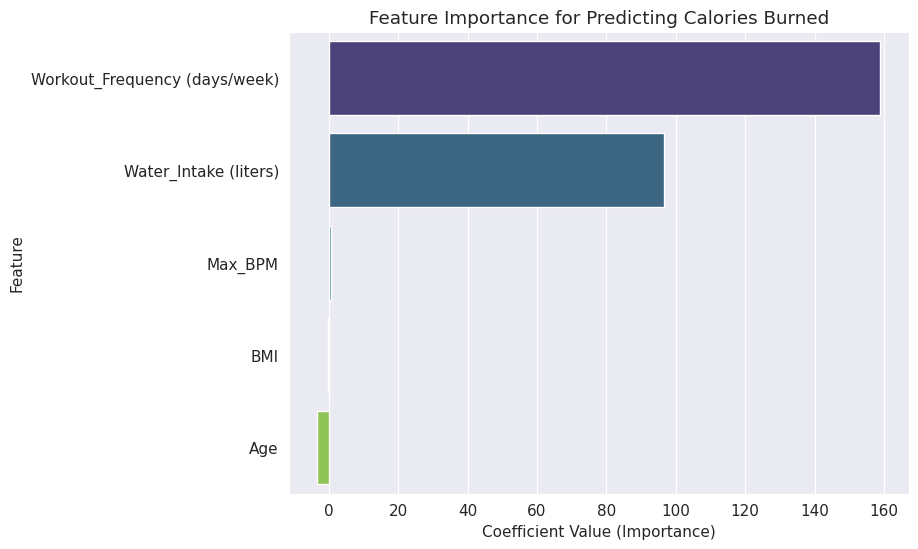

In [34]:
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance for Predicting Calories Burned")
plt.xlabel("Coefficient Value (Importance)")
plt.ylabel("Feature")
plt.show()


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# 1. Add Interaction Terms
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_interaction = interaction.fit_transform(X)
X_interaction = pd.DataFrame(X_interaction, columns=interaction.get_feature_names_out(X.columns))

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_interaction, y, test_size=0.2, random_state=42)

# 3. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
rf_predictions = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, rf_predictions)
r2_rf = r2_score(y_test, rf_predictions)

# Display Results
print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R² Score:", r2_rf)

# Feature Importances
rf_feature_importance = pd.DataFrame({
    'Feature': interaction.get_feature_names_out(X.columns),
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Features by Importance:")
print(rf_feature_importance.head(10))


Random Forest Mean Squared Error: 45698.38599282052
Random Forest R² Score: 0.45222209233163746

Top Features by Importance:
                                              Feature  Importance
13  Workout_Frequency (days/week) Water_Intake (li...    0.403392
12              Workout_Frequency (days/week) Max_BPM    0.072745
5                                             Age BMI    0.061273
9                   BMI Workout_Frequency (days/week)    0.059550
8                           Age Water_Intake (liters)    0.057931
7                                         Age Max_BPM    0.055802
14                      Max_BPM Water_Intake (liters)    0.051294
11                          BMI Water_Intake (liters)    0.042274
10                                        BMI Max_BPM    0.037802
6                   Age Workout_Frequency (days/week)    0.035653


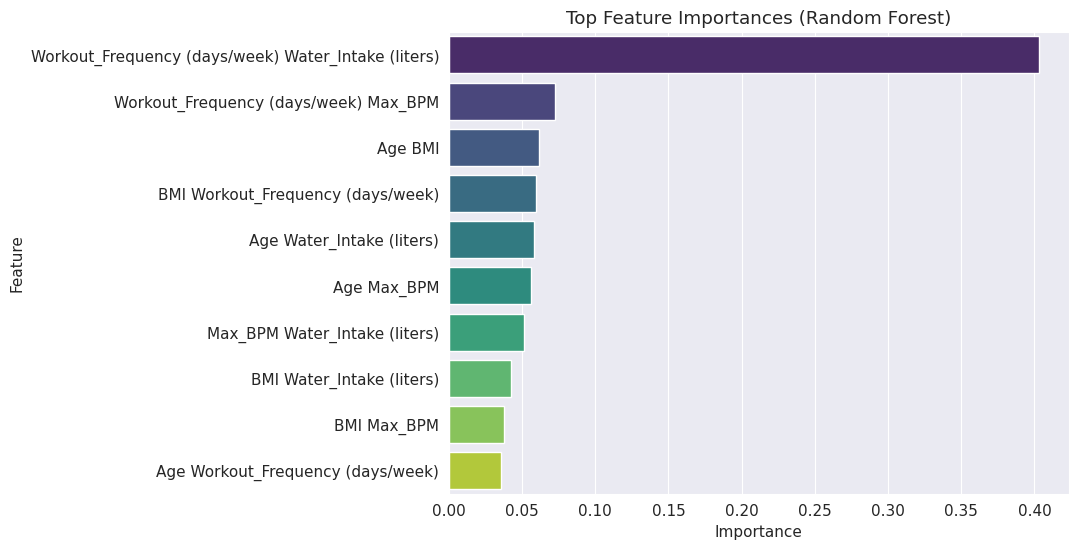

In [36]:
plt.figure(figsize=(8, 6))
sns.barplot(data=rf_feature_importance.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [38]:
rf_tuned = RandomForestRegressor(
    max_depth=10,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)
rf_tuned.fit(X_train, y_train)
rf_tuned_predictions = rf_tuned.predict(X_test)

mse_rf_tuned = mean_squared_error(y_test, rf_tuned_predictions)
r2_rf_tuned = r2_score(y_test, rf_tuned_predictions)

print("Tuned Random Forest MSE:", mse_rf_tuned)
print("Tuned Random Forest R²:", r2_rf_tuned)


Tuned Random Forest MSE: 44655.97437362467
Tuned Random Forest R²: 0.4647172832073503
